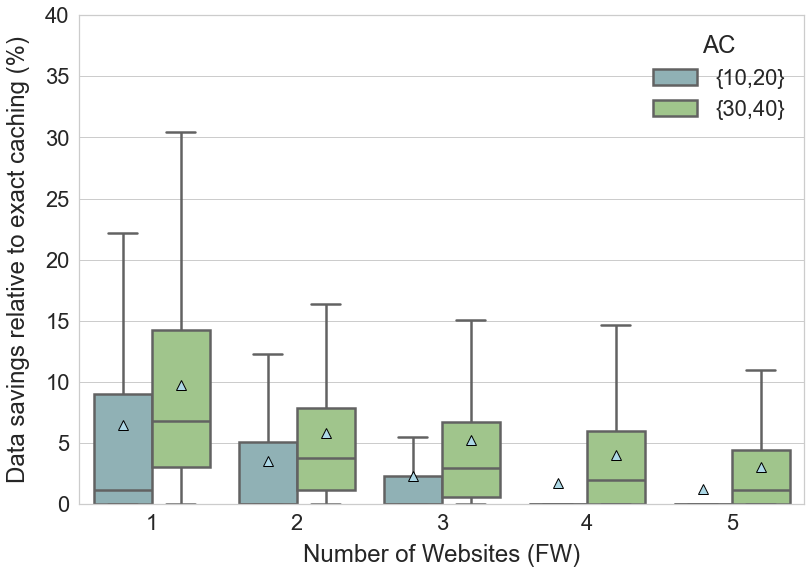

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('client/simulation.csv')

df['Data Savings (%)'] = (df['Simple Cache (KB)'] - df['Similarity Cache (KB)']) / df['Simple Cache (KB)'] * 100

df['AC'] = np.where(df['Number of Images (AC)'] <= 20, '{10,20}', '{30,40}')


custom_palette = sns.color_palette(["#8AB6BB", "#9DCE83"]) 
sns.set_theme(style="whitegrid", font_scale=2.0)

meanprops = {"marker": "^", "markerfacecolor": "lightblue", "markeredgecolor": "black", "markersize": 10}

plt.figure(figsize=(13, 9))  
sns.boxplot(x='Number of Websites (FW)', y='Data Savings (%)', data=df, hue='AC', 
            palette=custom_palette, fliersize=0, linewidth=2.5, showmeans=True, meanprops=meanprops, showfliers=False)

plt.legend(loc='upper right', title='AC', frameon=False)

plt.xlabel('Number of Websites (FW)', labelpad=10)
plt.ylabel('Data savings relative to exact caching (%)', labelpad=15)
plt.ylim(0, 40)
grouped_stats = df.groupby(['Number of Websites (FW)', 'AC'])['Data Savings (%)'].agg(['mean', 'median']).reset_index()

plt.show()


In [2]:
print(grouped_stats)

   Number of Websites (FW)       AC      mean    median
0                        1  {10,20}  6.457809  1.203362
1                        1  {30,40}  9.755265  6.772873
2                        2  {10,20}  3.580023  0.000000
3                        2  {30,40}  5.863071  3.797112
4                        3  {10,20}  2.352952  0.000000
5                        3  {30,40}  5.251090  2.981406
6                        4  {10,20}  1.761135  0.000000
7                        4  {30,40}  4.042106  1.966118
8                        5  {10,20}  1.264148  0.000000
9                        5  {30,40}  3.009627  1.141933
